# Data 606 - Capstone Project
###Movie Recommendation System

Goal of this project: To explore recommendation system on the movie dataset with both content-based method and collaborative method using Machine Learning Algorithms. 

Outline for this project:
1. EDA
2. Data prep. Singular Value Decomposition (SVD)atioNeural network-based Collaborative Filtering(NCF)tering

### Collaborative Filtering (Singular Value Decomposition)


In [8]:
from surprise import SVD, accuracy, SVDpp
from surprise.model_selection import cross_validate
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from surprise import Dataset
path='C:\\Users\\kamho\\OneDrive\\Documents\\GitHub\\movieRecommendationSystem\\MRS_repo\\data\\raw\\Data3_movielens\\'
movies_filename = 'movies.csv'
ratings_filename = 'ratings.csv'

In [9]:
data = Dataset.load_builtin('ml-100k', prompt = False)

In [10]:
data

In [11]:
df_rating = pd.read_csv(os.path.join(path, ratings_filename))
df_movies = pd.read_csv(os.path.join(path, movies_filename))


In [12]:
df_rating.rating.value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: rating, dtype: int64

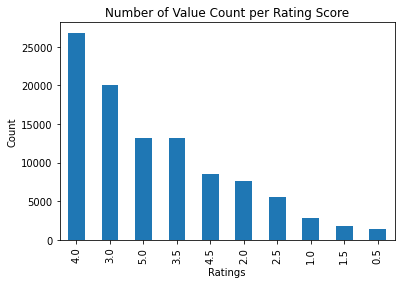

In [13]:
df_rating.rating.value_counts().plot(kind='bar')
plt.title('Number of Value Count per Rating Score')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

In [14]:
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [15]:
#Check if there is null value in the df_rating dataset
df_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [16]:
df_rating.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [17]:
#Drop the timestamp column as we don't need for SVD
df_rating = df_rating.drop(columns='timestamp')
df_rating.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


from sklearn import preprocessing
d = preprocessing.normalize(df_rating)
df_rating = pd.DataFrame(d, columns=df_rating.columns)



In [18]:
df_rating

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
...,...,...,...
100831,610,166534,4.0
100832,610,168248,5.0
100833,610,168250,5.0
100834,610,168252,5.0


In [19]:
#Loading the df_rating from a pandas dataframe using load_from_df() method and reader object
from surprise import Reader, Dataset
reader = Reader(rating_scale=(0.5,5))
data = Dataset.load_from_df(df_rating[['userId', 'movieId', 'rating']], reader)

In [20]:
from surprise.model_selection import train_test_split
trainset, testset = trainset, testset = train_test_split(data, test_size=0.20)

#### SVD algorithm is equivalent to Probabilistic Matrix Factorization

In [21]:
#Using the SVD algorithm
algo = SVD()
#Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset)

In [22]:
predictions = algo.test(testset)

In [23]:
accuracy.rmse(predictions)

RMSE: 0.8706


0.8706450760410331

In [24]:
cross_validate_svd = cross_validate(algo, data, measures = ['RMSE'],cv=5,verbose=True) 

Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8730  0.8810  0.8752  0.8717  0.8678  0.8737  0.0044  
Fit time          3.56    3.59    3.59    3.59    3.71    3.61    0.05    
Test time         0.16    0.09    0.15    0.09    0.09    0.12    0.03    


#### The SVDpp algorithm is an extension of SVD that takes into account implicit ratings which has been used in netflix competition.

In [16]:
#Using The SVD++ algo
algo= SVDpp()

#train the dataset on the SVD++ algo
algo.fit(trainset)

In [17]:
predictions = algo.test(testset)

In [18]:
accuracy.rmse(predictions)

RMSE: 0.8634


0.8634059888564043

In [19]:
cross_validate(algo, data, measures = ['RMSE'],cv=5,verbose=True) 

Evaluating RMSE of algorithm SVDpp on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8619  0.8562  0.8700  0.8558  0.8660  0.8620  0.0055  
Fit time          398.36  387.00  398.99  379.27  379.51  388.63  8.66    
Test time         5.87    6.41    6.06    6.10    5.97    6.08    0.18    


{'test_rmse': array([0.86185869, 0.8562196 , 0.86996815, 0.85579563, 0.86600255]),
 'fit_time': (398.3577299118042,
  386.9972355365753,
  398.99324893951416,
  379.27336978912354,
  379.5126118659973),
 'test_time': (5.868314743041992,
  6.407426357269287,
  6.063314914703369,
  6.101307153701782,
  5.965076923370361)}

In [142]:
import pandas as pd
import numpy as np
from tqdm import tqdm

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import pytorch_lightning as pl
from datetime import datetime

np.random.seed(123)

In [87]:
path2='C:\\Users\\kamho\\OneDrive\\Documents\\GitHub\\movieRecommendationSystem\\MRS_repo\\data\\raw\\kaggle_movielens\\'
df_rating = pd.read_csv(os.path.join(path, ratings_filename))


In [90]:
df_rating['timestamp']=df_rating.timestamp.apply(lambda x: datetime.fromtimestamp(x / 1e3))

In [91]:
df_rating

,userId,movieId,rating,timestamp
0,1,1,4.0,1970-01-11 23:03:02.703
1,1,3,4.0,1970-01-11 23:03:01.247
2,1,6,4.0,1970-01-11 23:03:02.224
3,1,47,5.0,1970-01-11 23:03:03.815
4,1,50,5.0,1970-01-11 23:03:02.931
...,...,...,...,...
100831,610,166534,4.0,1970-01-18 01:57:28.402
100832,610,168248,5.0,1970-01-18 01:57:30.091
100833,610,168250,5.0,1970-01-18 02:04:33.047
100834,610,168252,5.0,1970-01-18 01:57:26.352


In [92]:
print('There are {} rows of data from {} users'.format(len(df_rating), len(df_rating['userId'].unique())))

There are 100836 rows of data from 610 users


In [193]:
df_rating["timestamp"] = df_rating.timestamp.apply(lambda x: datetime.fromtimestamp(x / 1e3))

TypeError: unsupported operand type(s) for /: 'Timestamp' and 'float'

In [96]:
#split our ratings dataset into a train and test set using the leave-one-out methodology
df_rating['rank_latest'] = df_rating.groupby(['userId'])['timestamp'] \
                                .rank(method='first', ascending=False)
df_rating

,userId,movieId,rating,timestamp,rank_latest
0,1,1,4.0,1970-01-11 23:03:02.703,86.0
1,1,3,4.0,1970-01-11 23:03:01.247,196.0
2,1,6,4.0,1970-01-11 23:03:02.224,141.0
3,1,47,5.0,1970-01-11 23:03:03.815,18.0
4,1,50,5.0,1970-01-11 23:03:02.931,66.0
...,...,...,...,...,...
100831,610,166534,4.0,1970-01-18 01:57:28.402,314.0
100832,610,168248,5.0,1970-01-18 01:57:30.091,95.0
100833,610,168250,5.0,1970-01-18 02:04:33.047,23.0
100834,610,168252,5.0,1970-01-18 01:57:26.352,615.0


In [108]:
#Using earlier review for trainning, and using latest review for testing
train_ratings = df_rating[df_rating['rank_latest'] != 1]
test_ratings = df_rating[df_rating['rank_latest'] == 1]
train_ratings


,userId,movieId,rating,timestamp,rank_latest
0,1,1,4.0,1970-01-11 23:03:02.703,86.0
1,1,3,4.0,1970-01-11 23:03:01.247,196.0
2,1,6,4.0,1970-01-11 23:03:02.224,141.0
3,1,47,5.0,1970-01-11 23:03:03.815,18.0
4,1,50,5.0,1970-01-11 23:03:02.931,66.0
...,...,...,...,...,...
100831,610,166534,4.0,1970-01-18 01:57:28.402,314.0
100832,610,168248,5.0,1970-01-18 01:57:30.091,95.0
100833,610,168250,5.0,1970-01-18 02:04:33.047,23.0
100834,610,168252,5.0,1970-01-18 01:57:26.352,615.0


In [111]:
#Converting the dataset into an implicit feedback dataset
#Binarize the ratings to 1 means the user has interacted with the movie
train_ratings.loc[:, 'rating'] = 1
train_ratings.sample(10)

C:\Python\Python37\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,userId,movieId,rating,timestamp,rank_latest
49117,318,1682,1,1970-01-15 16:23:31.927,648.0
22367,152,318,1,1970-01-17 13:56:12.432,61.0
46258,305,33493,1,1970-01-17 16:35:36.024,537.0
20433,135,1379,1,1970-01-12 11:28:12.249,137.0
59822,387,4195,1,1970-01-14 05:52:44.624,217.0
16400,105,4878,1,1970-01-17 12:49:33.336,521.0
24593,170,48,1,1970-01-10 12:27:53.093,11.0
44726,298,3408,1,1970-01-17 13:06:38.147,586.0
46911,307,1201,1,1970-01-14 16:22:30.685,106.0
46941,307,1322,1,1970-01-14 12:28:04.959,931.0


In [123]:
# Generate negative samples to train our models
# Get a list of all movie IDs
all_movieIds = df_rating['movieId'].unique()

# Placeholders that will hold the training data
users, items, labels = [], [], []

# This is the set of items that each user has interaction with
user_item_set = set(zip(train_ratings['userId'], train_ratings['movieId']))

# 4:1 ratio of negative to positive samples
num_negatives = 4

for (u, i) in tqdm(user_item_set):
    users.append(u)
    items.append(i)
    labels.append(1) # items that the user has interacted with are positive
    for _ in range(num_negatives):
        # randomly select an item
        negative_item = np.random.choice(all_movieIds) 
        # check that the user has not interacted with this item
        while (u, negative_item) in user_item_set:
            negative_item = np.random.choice(all_movieIds)
        users.append(u)
        items.append(negative_item)
        labels.append(0) # items not interacted with are negative





  0%|          | 0/100226 [00:00<?, ?it/s]



  2%|▏         | 2189/100226 [00:00<00:04, 21731.37it/s]



  5%|▍         | 4535/100226 [00:00<00:04, 22648.12it/s]



  7%|▋         | 6800/100226 [00:00<00:04, 22472.36it/s]



  9%|▉         | 9048/100226 [00:00<00:04, 21733.43it/s]



 11%|█         | 11225/100226 [00:00<00:04, 21389.21it/s]



 13%|█▎        | 13367/100226 [00:00<00:04, 21277.98it/s]



 15%|█▌        | 15497/100226 [00:00<00:04, 20840.06it/s]



 18%|█▊        | 17613/100226 [00:00<00:03, 20889.70it/s]



 20%|█▉        | 19744/100226 [00:00<00:03, 20971.30it/s]



 22%|██▏       | 22000/100226 [00:01<00:03, 21405.34it/s]



 24%|██▍       | 24332/100226 [00:01<00:03, 21959.21it/s]



 27%|██▋       | 26719/100226 [00:01<00:03, 22483.81it/s]



 29%|██▉       | 29108/100226 [00:01<00:03, 22855.18it/s]



 31%|███▏      | 31553/100226 [00:01<00:02, 23282.08it/s]



 34%|███▍      | 33983/100226 [00:01<00:02, 23535.51it/s]



 36%|███▋      | 36394/100226 [00:01<00

In [124]:
class MovieLensTrainDataset(Dataset):
    """MovieLens PyTorch Dataset for Training
    
    Args:
        ratings (pd.DataFrame): Dataframe containing the movie ratings
        all_movieIds (list): List containing all movieIds
    
    """

    def __init__(self, ratings, all_movieIds):
        self.users, self.items, self.labels = self.get_dataset(ratings, all_movieIds)

    def __len__(self):
        return len(self.users)
  
    def __getitem__(self, idx):
        return self.users[idx], self.items[idx], self.labels[idx]

    def get_dataset(self, ratings, all_movieIds):
        users, items, labels = [], [], []
        user_item_set = set(zip(ratings['userId'], ratings['movieId']))

        num_negatives = 4
        for u, i in user_item_set:
            users.append(u)
            items.append(i)
            labels.append(1)
            for _ in range(num_negatives):
                negative_item = np.random.choice(all_movieIds)
                while (u, negative_item) in user_item_set:
                    negative_item = np.random.choice(all_movieIds)
                users.append(u)
                items.append(negative_item)
                labels.append(0)

        return torch.tensor(users), torch.tensor(items), torch.tensor(labels)

In [187]:
class NCF(pl.LightningModule):
    """ Neural Collaborative Filtering (NCF)
    
        Args:
            num_users (int): Number of unique users
            num_items (int): Number of unique items
            ratings (pd.DataFrame): Dataframe containing the movie ratings for training
            all_movieIds (list): List containing all movieIds (train + test)
    """
    
    def __init__(self, num_users, num_items, ratings, all_movieIds):
        super().__init__()
        self.user_embedding = nn.Embedding(num_embeddings=num_users, embedding_dim=8)
        self.item_embedding = nn.Embedding(num_embeddings=num_items, embedding_dim=8)
        self.fc1 = nn.Linear(in_features=16, out_features=64)
        self.fc2 = nn.Linear(in_features=64, out_features=32)
        self.output = nn.Linear(in_features=32, out_features=1)
        self.ratings = ratings
        self.all_movieIds = all_movieIds
        
    def forward(self, user_input, item_input):
        
        # Pass through embedding layers
        user_embedded = self.user_embedding(user_input)
        item_embedded = self.item_embedding(item_input)

        # Concat the two embedding layers
        vector = torch.cat([user_embedded, item_embedded], dim=-1)

        # Pass through dense layer
        vector = nn.ReLU()(self.fc1(vector))
        vector = nn.ReLU()(self.fc2(vector))

        # Output layer
        pred = nn.Sigmoid()(self.output(vector))

        return pred
    
    def training_step(self, batch, batch_idx):
        user_input, item_input, labels = batch
        predicted_labels = self(user_input, item_input)
        loss = nn.BCELoss()(predicted_labels, labels.view(-1, 1).float())
        return loss

    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters())

    def train_dataloader(self):
        return DataLoader(MovieLensTrainDataset(self.ratings, self.all_movieIds),
                          batch_size=512, num_workers=1)

In [188]:
num_users = df_rating['userId'].max()+1
num_items = df_rating['movieId'].max()+1

all_movieIds = df_rating['movieId'].unique()

model = NCF(num_users, num_items, train_ratings, all_movieIds)

In [189]:
import pytorch_lightning as pl
print(torch.__version__)
print(pl.__version__)


1.8.1+cpu
1.2.10


In [186]:
trainer = pl.Trainer(max_epochs=5, gpus=1, reload_dataloaders_every_epoch=True,
                     progress_bar_refresh_rate=50, logger=False, checkpoint_callback=False)

trainer.fit(model)


GPU available: False, used: False
TPU available: False, using: 0 TPU cores

  | Name           | Type      | Params
---------------------------------------------
0 | user_embedding | Embedding | 4.9 K 
1 | item_embedding | Embedding | 1.5 M 
2 | fc1            | Linear    | 1.1 K 
3 | fc2            | Linear    | 2.1 K 
4 | output         | Linear    | 33    
---------------------------------------------
1.6 M     Trainable params
0         Non-trainable params
1.6 M     Total params
6.228     Total estimated model params size (MB)


AttributeError: 'NCF' object has no attribute 'rating'

In [156]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="2"